In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math
from pandas.plotting import scatter_matrix

In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions

ModuleNotFoundError: No module named 'tabulate'

In [3]:
x=pd.read_csv("Annual_Stock_Price_Fundamentals_Ratios.csv", index_col=0)
y=pd.read_csv("Annual_Stock_Price_Performance_Percentage.csv", index_col=0)
y=y["Perf"]

In [4]:
x = x.join(y)

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

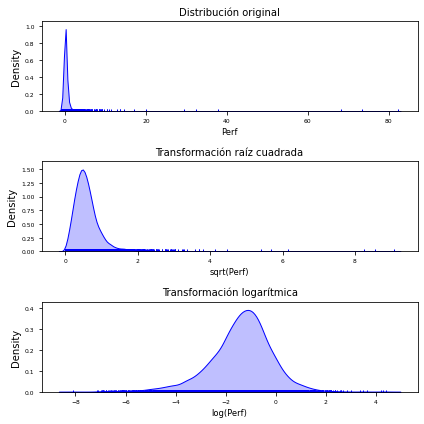

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    x.Perf,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Perf', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(x.Perf),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(Perf)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(x.Perf),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(Perf)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [6]:
import seaborn as sns

IndexError: index 4 is out of bounds for axis 0 with size 4

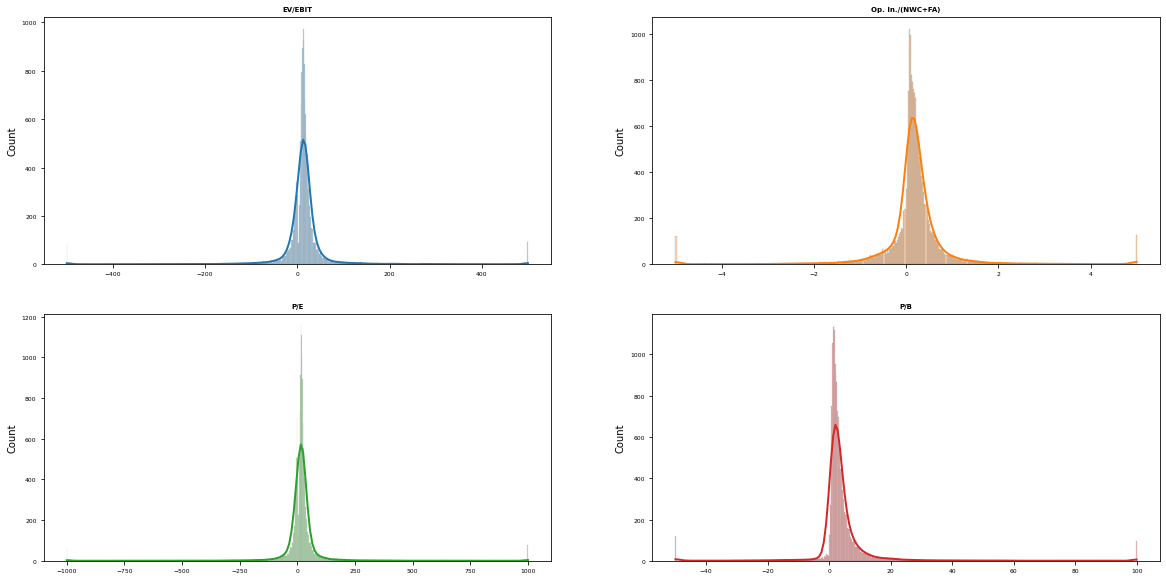

In [8]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flat
columnas_numeric = x.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Perf')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = x,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [9]:
print(x)

          EV/EBIT  Op. In./(NWC+FA)         P/E        P/B         P/S  \
0        8.389552          0.297085    8.983232   2.432739    1.078175   
1      161.418182          0.012761 -330.374194   4.073827    2.285561   
2       19.788151          0.139203   20.694883   4.374320    2.600165   
3        9.630571          0.226045   11.832164   2.774363    1.810151   
4       12.630608          0.286923   12.423886   2.762727    2.088763   
...           ...               ...         ...        ...         ...   
18515   -0.335651         -0.701331   -1.841155   1.275704  500.000000   
18516   -0.271501         -0.455408   -2.410810   1.050584  500.000000   
18517   17.993625          1.973522   22.558857  33.893509    7.090559   
18518   17.690044          1.270833   19.954644  20.515204    5.971951   
18519   34.007377          0.607121   44.278564  21.385647    9.242877   

       Op. In./Interest Expense  Working Capital Ratio       RoE      ROCE  \
0                     79.500000  

In [15]:
print(columnas_numeric)

Index(['EV/EBIT', 'Op. In./(NWC+FA)', 'P/E', 'P/B', 'P/S',
       'Op. In./Interest Expense', 'Working Capital Ratio', 'RoE', 'ROCE',
       'Debt/Equity', 'Debt Ratio', 'Cash Ratio', 'Asset Turnover',
       'Gross Profit Margin', '(CA-CL)/TA', 'RE/TA', 'EBIT/TA',
       'Book Equity/TL'],
      dtype='object')


In [12]:
enumerate(columnas_numeric)

In [13]:
en = enumerate(columnas_numeric)

In [14]:
en

In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18520 entries, 0 to 18519
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EV/EBIT                   18520 non-null  float64
 1   Op. In./(NWC+FA)          18520 non-null  float64
 2   P/E                       18520 non-null  float64
 3   P/B                       18520 non-null  float64
 4   P/S                       18520 non-null  float64
 5   Op. In./Interest Expense  18520 non-null  float64
 6   Working Capital Ratio     18520 non-null  float64
 7   RoE                       18520 non-null  float64
 8   ROCE                      18520 non-null  float64
 9   Debt/Equity               18520 non-null  float64
 10  Debt Ratio                18520 non-null  float64
 11  Cash Ratio                18520 non-null  float64
 12  Asset Turnover            18520 non-null  float64
 13  Gross Profit Margin       18520 non-null  float64
 14  (CA-CL

In [17]:
print(i, colum)

4 P/S


In [18]:
for i, colum in enumerate(columnas_numeric):

IndentationError: expected an indented block (Temp/ipykernel_25740/420131654.py, line 1)

In [19]:
columnas_numeric

Index(['EV/EBIT', 'Op. In./(NWC+FA)', 'P/E', 'P/B', 'P/S',
       'Op. In./Interest Expense', 'Working Capital Ratio', 'RoE', 'ROCE',
       'Debt/Equity', 'Debt Ratio', 'Cash Ratio', 'Asset Turnover',
       'Gross Profit Margin', '(CA-CL)/TA', 'RE/TA', 'EBIT/TA',
       'Book Equity/TL'],
      dtype='object')

In [20]:
for index, name in enumerate(columnas_numeric):

IndentationError: expected an indented block (Temp/ipykernel_25740/245847129.py, line 1)

In [21]:
colum

'P/S'

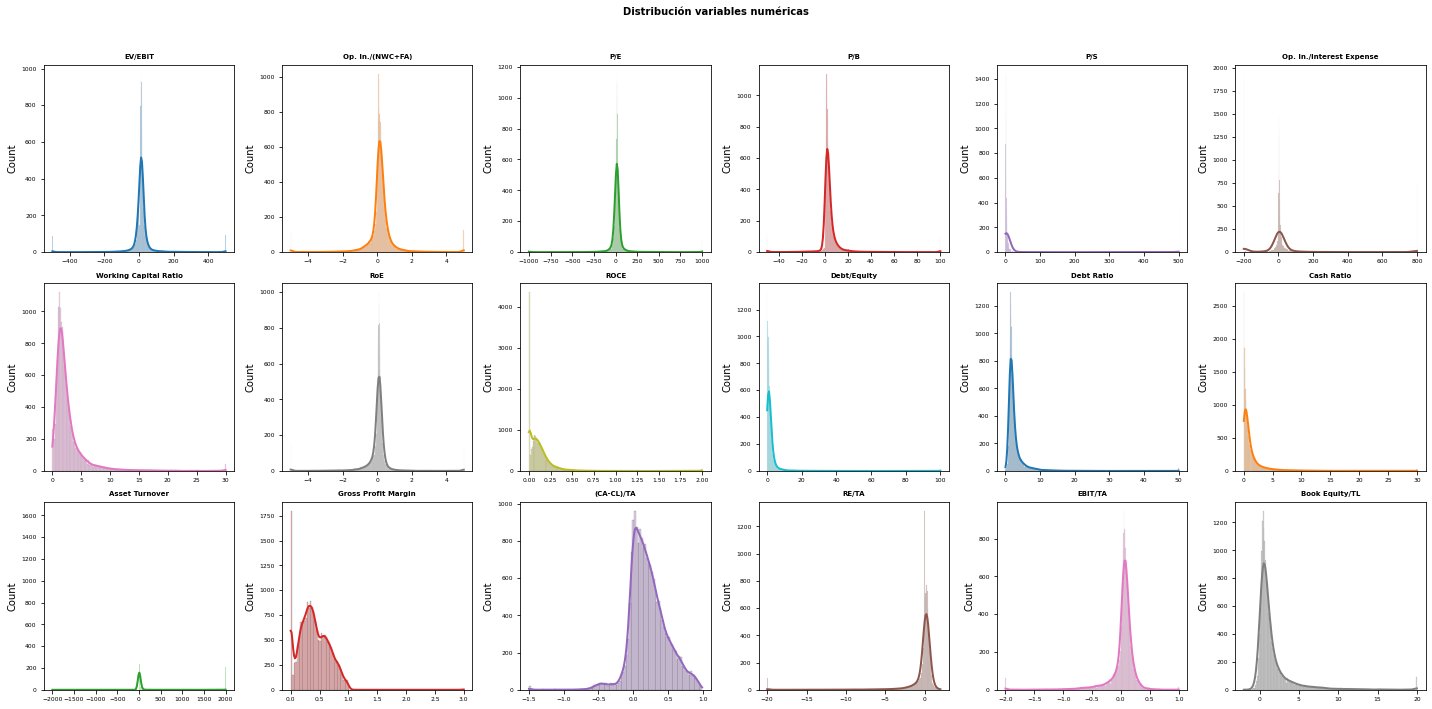

In [26]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 10))
axes = axes.flat
columnas_numeric = x.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Perf')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = x,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [23]:
COLUM

NameError: name 'COLUM' is not defined

In [31]:
colum

'Book Equity/TL'

IndexError: index 2 is out of bounds for axis 0 with size 2

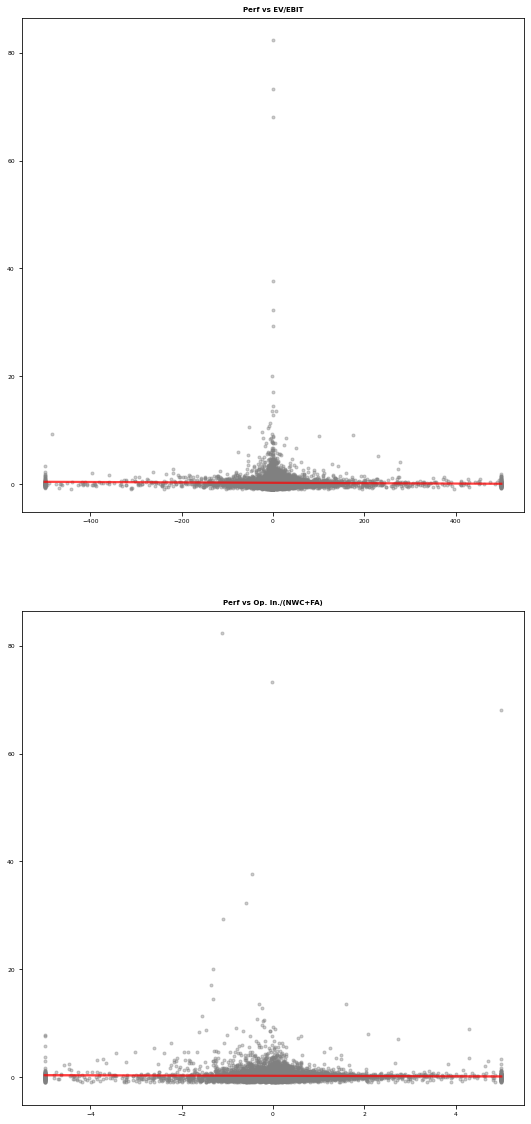

In [36]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 20))
axes = axes.flat
columnas_numeric = x.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Perf')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = x[colum],
        y           = x['Perf'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Perf vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Perf', fontsize = 10, fontweight = "bold");

In [29]:
import matplotlib.ticker as ticker

In [37]:
# Write code to plot out all distributions of X in a nice diagram
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
y_t=pd.DataFrame(transformer.fit_transform(y), columns=y.keys())

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.76400477  0.37331081 -0.15236908 ... -0.00879121  1.33791749
  0.29333333].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [38]:
y

0        0.764005
1        0.373311
2       -0.152369
3        0.185295
4        0.416215
           ...   
18515   -0.247917
18516    0.268698
18517   -0.008791
18518    1.337917
18519    0.293333
Name: Perf, Length: 18520, dtype: float64

In [55]:
y=pd.read_csv("Annual_Stock_Price_Performance_Percentage.csv", index_col=0)

In [56]:
y

,Ticker,Perf
0,A,0.764005
1,A,0.373311
2,A,-0.152369
3,A,0.185295
4,A,0.416215
...,...,...
18515,ZYNE,-0.247917
18516,ZYNE,0.268698
18517,ZYXI,-0.008791
18518,ZYXI,1.337917


In [59]:
y.drop('Ticker', axis=1, inplace=True)

In [60]:
y

,Perf
0,0.764005
1,0.373311
2,-0.152369
3,0.185295
4,0.416215
...,...
18515,-0.247917
18516,0.268698
18517,-0.008791
18518,1.337917


In [62]:
# Write code to plot out all distributions of X in a nice diagram
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
y_t=pd.DataFrame(transformer.fit_transform(y), columns=y.keys())

In [63]:
y

,Perf
0,0.764005
1,0.373311
2,-0.152369
3,0.185295
4,0.416215
...,...
18515,-0.247917
18516,0.268698
18517,-0.008791
18518,1.337917


In [64]:
y.describe()

,Perf
count,18520.000000
mean,0.213595
std,1.271590
min,-0.993542
25%,-0.128736
50%,0.098373
75%,0.350978
max,82.375000


In [65]:
y=pd.read_csv("Annual_Stock_Price_Performance_Percentage.csv", index_col=0)

In [66]:
y.describe()

,Perf
count,18520.000000
mean,0.213595
std,1.271590
min,-0.993542
25%,-0.128736
50%,0.098373
75%,0.350978
max,82.375000


In [67]:
y

,Ticker,Perf
0,A,0.764005
1,A,0.373311
2,A,-0.152369
3,A,0.185295
4,A,0.416215
...,...,...
18515,ZYNE,-0.247917
18516,ZYNE,0.268698
18517,ZYXI,-0.008791
18518,ZYXI,1.337917


In [68]:
y.drop('Ticker', axis=1, inplace=True)

In [69]:
y

,Perf
0,0.764005
1,0.373311
2,-0.152369
3,0.185295
4,0.416215
...,...
18515,-0.247917
18516,0.268698
18517,-0.008791
18518,1.337917


In [70]:
# Write code to plot out all distributions of X in a nice diagram
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
y_t=pd.DataFrame(transformer.fit_transform(y), columns=y.keys())

In [71]:
y_t

,Perf
0,1.111840
1,0.573270
2,-0.546977
3,0.242631
4,0.641033
...,...
18515,-0.829410
18516,0.396649
18517,-0.173397
18518,1.683839


In [73]:
y_t.describe()

,Perf
count,1.852000e+04
mean,-3.042323e-18
std,1.000027e+00
min,-4.013269e+00
25%,-4.813208e-01
50%,6.740925e-02
75%,5.369707e-01
max,6.582668e+00


In [74]:
x

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL,Perf
0,8.389552,0.297085,8.983232,2.432739,1.078175,79.500000,2.392481,0.270809,0.145323,1.738179,1.575315,1.074436,7.007282,0.553516,0.264307,0.398316,0.117739,0.575315,0.764005
1,161.418182,0.012761,-330.374194,4.073827,2.285561,0.796610,3.527159,-0.012331,0.010171,2.027844,1.493135,2.219947,5.302959,0.511493,0.372832,0.362585,0.008671,0.493135,0.373311
2,19.788151,0.139203,20.694883,4.374320,2.600165,7.447368,2.000973,0.211372,0.116135,1.996292,1.500929,0.859228,5.555102,0.538207,0.318276,0.355198,0.079208,0.500929,-0.152369
3,9.630571,0.226045,11.832164,2.774363,1.810151,14.875000,3.031573,0.234476,0.152909,1.098471,1.910356,1.919978,6.575547,0.533485,0.412057,0.491995,0.121895,0.910356,0.185295
4,12.630608,0.286923,12.423886,2.762727,2.088763,12.163043,2.445325,0.222372,0.131320,1.032015,1.968978,1.241944,5.891753,0.525518,0.259681,0.522494,0.107726,0.968978,0.416215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.335651,-0.701331,-1.841155,1.275704,500.000000,42.023160,6.884329,-0.692882,0.000000,0.168846,6.922574,6.144881,0.231206,0.000000,0.850020,-1.751025,-0.607070,5.922574,-0.247917
18516,-0.271501,-0.455408,-2.410810,1.050584,500.000000,22.547108,7.219675,-0.435780,0.000000,0.160957,7.212825,5.810440,0.000000,0.000000,0.854534,-1.718639,-0.392706,6.212825,0.268698
18517,17.993625,1.973522,22.558857,33.893509,7.090559,6.168276,2.078719,1.502448,1.824561,0.821501,2.217283,1.381922,124.638298,0.794341,0.486505,-0.270019,1.000000,1.217283,-0.008791
18518,17.690044,1.270833,19.954644,20.515204,5.971951,67.337662,2.051267,1.028092,0.845289,1.072005,1.932831,1.450379,38.970696,0.810822,0.381331,0.252662,0.538673,0.932831,1.337917


In [78]:
x=pd.read_csv("Annual_Stock_Price_Fundamentals_Ratios.csv", index_col=0)

In [79]:
x

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL
0,8.389552,0.297085,8.983232,2.432739,1.078175,79.500000,2.392481,0.270809,0.145323,1.738179,1.575315,1.074436,7.007282,0.553516,0.264307,0.398316,0.117739,0.575315
1,161.418182,0.012761,-330.374194,4.073827,2.285561,0.796610,3.527159,-0.012331,0.010171,2.027844,1.493135,2.219947,5.302959,0.511493,0.372832,0.362585,0.008671,0.493135
2,19.788151,0.139203,20.694883,4.374320,2.600165,7.447368,2.000973,0.211372,0.116135,1.996292,1.500929,0.859228,5.555102,0.538207,0.318276,0.355198,0.079208,0.500929
3,9.630571,0.226045,11.832164,2.774363,1.810151,14.875000,3.031573,0.234476,0.152909,1.098471,1.910356,1.919978,6.575547,0.533485,0.412057,0.491995,0.121895,0.910356
4,12.630608,0.286923,12.423886,2.762727,2.088763,12.163043,2.445325,0.222372,0.131320,1.032015,1.968978,1.241944,5.891753,0.525518,0.259681,0.522494,0.107726,0.968978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.335651,-0.701331,-1.841155,1.275704,500.000000,42.023160,6.884329,-0.692882,0.000000,0.168846,6.922574,6.144881,0.231206,0.000000,0.850020,-1.751025,-0.607070,5.922574
18516,-0.271501,-0.455408,-2.410810,1.050584,500.000000,22.547108,7.219675,-0.435780,0.000000,0.160957,7.212825,5.810440,0.000000,0.000000,0.854534,-1.718639,-0.392706,6.212825
18517,17.993625,1.973522,22.558857,33.893509,7.090559,6.168276,2.078719,1.502448,1.824561,0.821501,2.217283,1.381922,124.638298,0.794341,0.486505,-0.270019,1.000000,1.217283
18518,17.690044,1.270833,19.954644,20.515204,5.971951,67.337662,2.051267,1.028092,0.845289,1.072005,1.932831,1.450379,38.970696,0.810822,0.381331,0.252662,0.538673,0.932831


In [80]:
# Write code to plot out all distributions of X in a nice diagram
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
x_t=pd.DataFrame(transformer.fit_transform(x), columns=x.keys())

In [253]:
x

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL
0,8.389552,0.297085,8.983232,2.432739,1.078175,79.500000,2.392481,0.270809,0.145323,1.738179,1.575315,1.074436,7.007282,0.553516,0.264307,0.398316,0.117739,0.575315
1,161.418182,0.012761,-330.374194,4.073827,2.285561,0.796610,3.527159,-0.012331,0.010171,2.027844,1.493135,2.219947,5.302959,0.511493,0.372832,0.362585,0.008671,0.493135
2,19.788151,0.139203,20.694883,4.374320,2.600165,7.447368,2.000973,0.211372,0.116135,1.996292,1.500929,0.859228,5.555102,0.538207,0.318276,0.355198,0.079208,0.500929
3,9.630571,0.226045,11.832164,2.774363,1.810151,14.875000,3.031573,0.234476,0.152909,1.098471,1.910356,1.919978,6.575547,0.533485,0.412057,0.491995,0.121895,0.910356
4,12.630608,0.286923,12.423886,2.762727,2.088763,12.163043,2.445325,0.222372,0.131320,1.032015,1.968978,1.241944,5.891753,0.525518,0.259681,0.522494,0.107726,0.968978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.335651,-0.701331,-1.841155,1.275704,500.000000,42.023160,6.884329,-0.692882,0.000000,0.168846,6.922574,6.144881,0.231206,0.000000,0.850020,-1.751025,-0.607070,5.922574
18516,-0.271501,-0.455408,-2.410810,1.050584,500.000000,22.547108,7.219675,-0.435780,0.000000,0.160957,7.212825,5.810440,0.000000,0.000000,0.854534,-1.718639,-0.392706,6.212825
18517,17.993625,1.973522,22.558857,33.893509,7.090559,6.168276,2.078719,1.502448,1.824561,0.821501,2.217283,1.381922,124.638298,0.794341,0.486505,-0.270019,1.000000,1.217283
18518,17.690044,1.270833,19.954644,20.515204,5.971951,67.337662,2.051267,1.028092,0.845289,1.072005,1.932831,1.450379,38.970696,0.810822,0.381331,0.252662,0.538673,0.932831


In [83]:
x_t

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL
0,-0.111867,0.131299,-0.092956,-0.121411,-0.495570,0.428984,0.303209,0.281666,0.621688,0.541736,-0.442724,0.572833,-0.108188,0.686832,0.175533,0.471573,0.359862,-0.419535
1,2.355120,-0.199498,-2.668638,0.026984,0.225964,0.034164,0.819106,-0.063969,-1.122831,0.699416,-0.556484,1.202821,-0.120041,0.534547,0.588574,0.397270,-0.260341,-0.525099
2,0.062577,-0.052973,0.008725,0.053891,0.347152,0.073755,0.059199,0.208555,0.350177,0.683526,-0.545360,0.360050,-0.118262,0.631846,0.380757,0.382218,0.127405,-0.514746
3,-0.093114,0.048214,-0.068360,-0.090291,0.002306,0.114393,0.621135,0.236942,0.685420,0.063946,-0.047928,1.088751,-0.111154,0.614770,0.738201,0.678313,0.385827,-0.056923
4,-0.047498,0.119398,-0.063238,-0.091349,0.140148,0.099811,0.332868,0.222065,0.496876,-0.000403,0.011630,0.708324,-0.115902,0.585844,0.157959,0.749390,0.298012,-0.002462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.240063,-1.010213,-0.184328,-0.227983,2.335179,0.251855,1.616390,-0.868335,-1.319848,-1.379625,1.797294,1.779170,-0.159107,-1.767728,2.419697,-1.416736,-2.296170,1.787671
18516,-0.239172,-0.733772,-0.188936,-0.248978,2.335179,0.154545,1.667409,-0.568169,-1.319848,-1.400212,1.833308,1.757352,-0.161183,-1.767728,2.437122,-1.404703,-1.775553,1.832917
18517,0.034841,2.149415,0.025021,2.550836,1.168115,0.066482,0.111397,1.845467,2.480940,-0.230777,0.238900,0.805948,0.510956,1.486036,1.022663,-0.535690,10.667886,0.205579
18518,0.030158,1.292322,0.002261,1.442070,1.046310,0.372538,0.093198,1.233700,2.343180,0.038748,-0.024801,0.849349,0.082544,1.536675,0.620978,0.184170,3.977933,-0.035774


In [213]:
x_t = x_t.join(y_t)

In [214]:
x_t

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL,Perf
0,-0.111867,0.131299,-0.092956,-0.121411,-0.495570,0.428984,0.303209,0.281666,0.621688,0.541736,-0.442724,0.572833,-0.108188,0.686832,0.175533,0.471573,0.359862,-0.419535,1.111840
1,2.355120,-0.199498,-2.668638,0.026984,0.225964,0.034164,0.819106,-0.063969,-1.122831,0.699416,-0.556484,1.202821,-0.120041,0.534547,0.588574,0.397270,-0.260341,-0.525099,0.573270
2,0.062577,-0.052973,0.008725,0.053891,0.347152,0.073755,0.059199,0.208555,0.350177,0.683526,-0.545360,0.360050,-0.118262,0.631846,0.380757,0.382218,0.127405,-0.514746,-0.546977
3,-0.093114,0.048214,-0.068360,-0.090291,0.002306,0.114393,0.621135,0.236942,0.685420,0.063946,-0.047928,1.088751,-0.111154,0.614770,0.738201,0.678313,0.385827,-0.056923,0.242631
4,-0.047498,0.119398,-0.063238,-0.091349,0.140148,0.099811,0.332868,0.222065,0.496876,-0.000403,0.011630,0.708324,-0.115902,0.585844,0.157959,0.749390,0.298012,-0.002462,0.641033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.240063,-1.010213,-0.184328,-0.227983,2.335179,0.251855,1.616390,-0.868335,-1.319848,-1.379625,1.797294,1.779170,-0.159107,-1.767728,2.419697,-1.416736,-2.296170,1.787671,-0.829410
18516,-0.239172,-0.733772,-0.188936,-0.248978,2.335179,0.154545,1.667409,-0.568169,-1.319848,-1.400212,1.833308,1.757352,-0.161183,-1.767728,2.437122,-1.404703,-1.775553,1.832917,0.396649
18517,0.034841,2.149415,0.025021,2.550836,1.168115,0.066482,0.111397,1.845467,2.480940,-0.230777,0.238900,0.805948,0.510956,1.486036,1.022663,-0.535690,10.667886,0.205579,-0.173397
18518,0.030158,1.292322,0.002261,1.442070,1.046310,0.372538,0.093198,1.233700,2.343180,0.038748,-0.024801,0.849349,0.082544,1.536675,0.620978,0.184170,3.977933,-0.035774,1.683839


In [212]:
y_t

,Perf
0,1.111840
1,0.573270
2,-0.546977
3,0.242631
4,0.641033
...,...
18515,-0.829410
18516,0.396649
18517,-0.173397
18518,1.683839


IndexError: index 6 is out of bounds for axis 0 with size 6

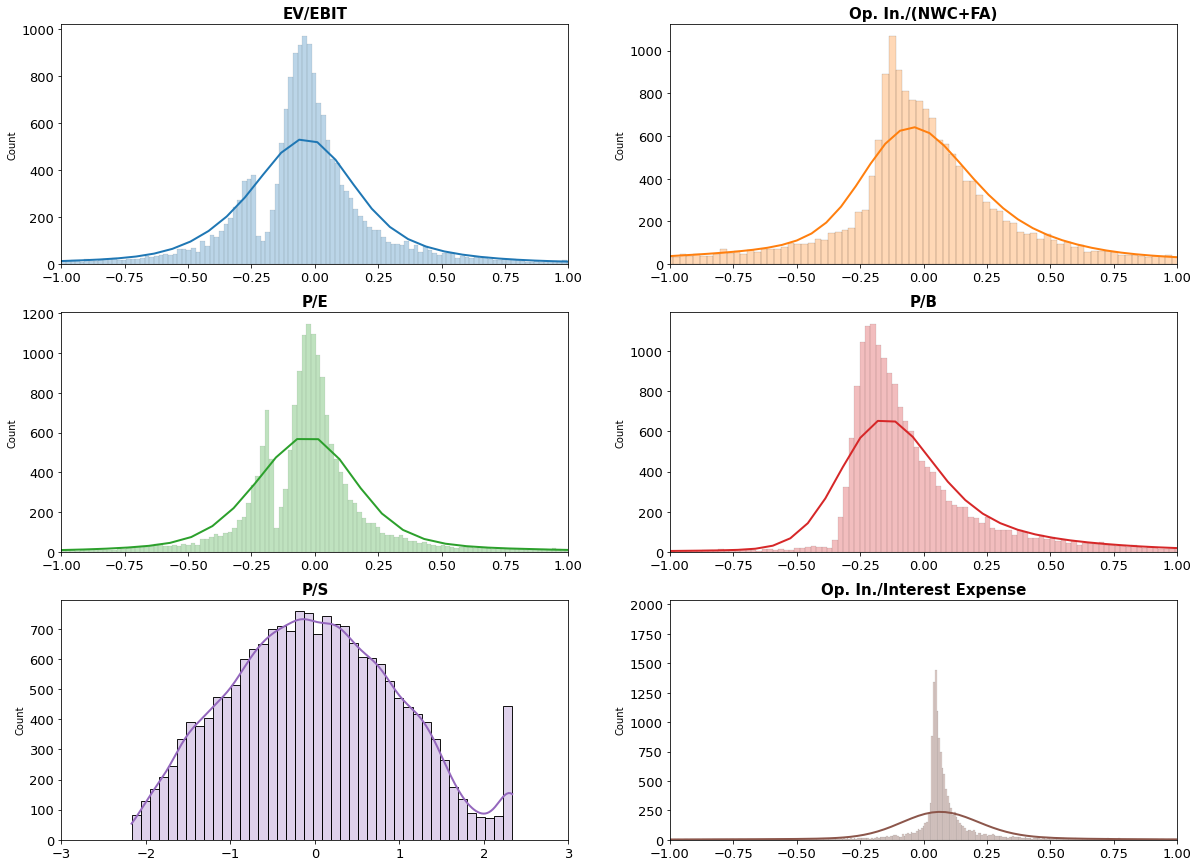

In [261]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
axes = axes.flat
columnas_numeric = x_t.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Perf')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = x_t,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 13)
    axes[i].set_xlabel("")
    axes[i].set_xlim([-1, 1])
    axes[4].set_xlim([-3, 3])
    plt.savefig('plotdistxtransformada.png')

    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a fi

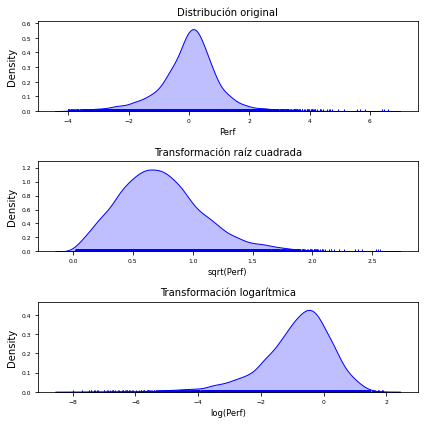

In [256]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    x_t.Perf,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Perf', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(x_t.Perf),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(Perf)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(x_t.Perf),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(Perf)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()
plt.savefig('plotdistytransformada.png')

IndexError: index 8 is out of bounds for axis 0 with size 8

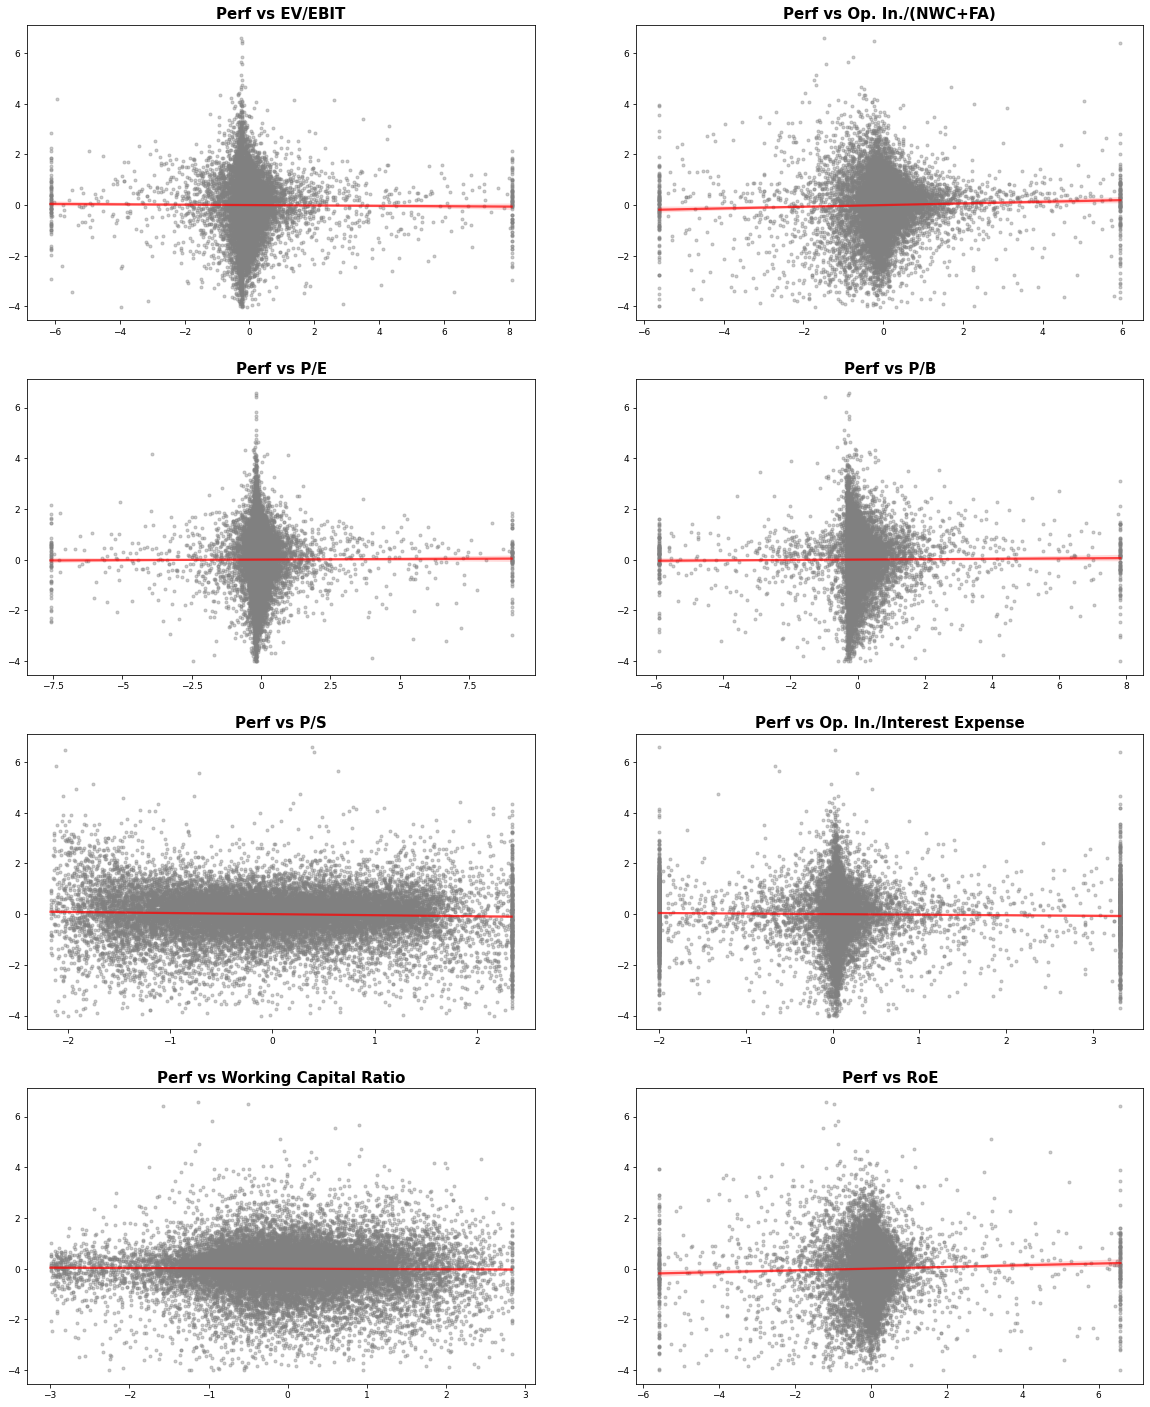

In [118]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 25))
axes = axes.flat
columnas_numeric = x_t.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Perf')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = x_t[colum],
        y           = x_t['Perf'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Perf vs {colum}", fontsize = 15, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    plt.savefig('corrxygraph.png')

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Perf', fontsize = 10, fontweight = "bold");


In [119]:
x_t

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL,Perf
0,-0.111867,0.131299,-0.092956,-0.121411,-0.495570,0.428984,0.303209,0.281666,0.621688,0.541736,-0.442724,0.572833,-0.108188,0.686832,0.175533,0.471573,0.359862,-0.419535,1.111840
1,2.355120,-0.199498,-2.668638,0.026984,0.225964,0.034164,0.819106,-0.063969,-1.122831,0.699416,-0.556484,1.202821,-0.120041,0.534547,0.588574,0.397270,-0.260341,-0.525099,0.573270
2,0.062577,-0.052973,0.008725,0.053891,0.347152,0.073755,0.059199,0.208555,0.350177,0.683526,-0.545360,0.360050,-0.118262,0.631846,0.380757,0.382218,0.127405,-0.514746,-0.546977
3,-0.093114,0.048214,-0.068360,-0.090291,0.002306,0.114393,0.621135,0.236942,0.685420,0.063946,-0.047928,1.088751,-0.111154,0.614770,0.738201,0.678313,0.385827,-0.056923,0.242631
4,-0.047498,0.119398,-0.063238,-0.091349,0.140148,0.099811,0.332868,0.222065,0.496876,-0.000403,0.011630,0.708324,-0.115902,0.585844,0.157959,0.749390,0.298012,-0.002462,0.641033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.240063,-1.010213,-0.184328,-0.227983,2.335179,0.251855,1.616390,-0.868335,-1.319848,-1.379625,1.797294,1.779170,-0.159107,-1.767728,2.419697,-1.416736,-2.296170,1.787671,-0.829410
18516,-0.239172,-0.733772,-0.188936,-0.248978,2.335179,0.154545,1.667409,-0.568169,-1.319848,-1.400212,1.833308,1.757352,-0.161183,-1.767728,2.437122,-1.404703,-1.775553,1.832917,0.396649
18517,0.034841,2.149415,0.025021,2.550836,1.168115,0.066482,0.111397,1.845467,2.480940,-0.230777,0.238900,0.805948,0.510956,1.486036,1.022663,-0.535690,10.667886,0.205579,-0.173397
18518,0.030158,1.292322,0.002261,1.442070,1.046310,0.372538,0.093198,1.233700,2.343180,0.038748,-0.024801,0.849349,0.082544,1.536675,0.620978,0.184170,3.977933,-0.035774,1.683839


In [158]:
x_t.describe()

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL
count,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04
mean,9.876309e-18,-4.261050e-17,1.301005e-17,-2.661658e-18,-7.733195e-17,2.164575e-16,4.954041e-17,1.127008e-18,2.601231e-16,1.217828e-16,-3.753297e-16,1.384182e-16,3.419091e-17,7.251339e-16,1.204820e-16,-8.444769e-17,-1.774439e-18,1.883423e-16
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-6.136959e+00,-5.616128e+00,-7.585029e+00,-5.905003e+00,-2.167499e+00,-1.998451e+00,-2.993989e+00,-5.575379e+00,-1.319848e+00,-1.880849e+00,-6.125370e+00,-1.506626e+00,-4.582098e+01,-1.767728e+00,-6.345495e+00,-2.965183e+00,-3.963959e+00,-1.372873e+01
25%,-1.581217e-01,-1.667571e-01,-1.739854e-01,-2.155526e-01,-7.329659e-01,1.958060e-02,-6.151923e-01,-6.203011e-02,-9.711779e-01,-7.241925e-01,-6.435468e-01,-8.690216e-01,-1.427014e-01,-6.935666e-01,-6.644584e-01,-3.898937e-01,-2.382038e-01,-6.063884e-01
50%,-3.939744e-02,-2.743515e-02,-2.556573e-02,-1.163387e-01,-2.939949e-02,5.397443e-02,-4.237145e-02,6.534097e-02,1.429169e-02,1.814422e-02,-1.115927e-01,-9.833563e-02,-1.168317e-01,-7.047932e-03,-1.372415e-01,-1.182109e-02,4.773033e-02,-1.151637e-01
75%,8.373188e-02,1.851964e-01,6.735437e-02,6.796116e-02,7.052005e-01,1.096705e-01,6.184550e-01,1.745250e-01,7.394285e-01,6.942649e-01,6.046200e-01,7.939448e-01,-7.723192e-02,7.789022e-01,5.661295e-01,4.602932e-01,3.707866e-01,5.439861e-01
max,8.086571e+00,5.953564e+00,9.031946e+00,7.820170e+00,2.335179e+00,3.319335e+00,2.826126e+00,6.576156e+00,2.485435e+00,2.605495e+00,2.614201e+00,2.093884e+00,7.255580e+00,5.897592e+00,2.956778e+00,6.615269e+00,1.066789e+01,2.792616e+00


In [120]:
corr = x_t.corr()

In [123]:
corr

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL,Perf
EV/EBIT,1.000000,0.036897,0.245353,0.020744,0.027868,-0.077388,-0.039820,0.047295,0.049638,0.021823,-0.004550,-0.046068,-0.017648,0.041724,-0.053984,0.057970,0.085595,-0.005454,-0.007426
Op. In./(NWC+FA),0.036897,1.000000,0.031297,-0.012587,-0.075304,-0.118503,-0.124166,0.201667,0.365940,0.043293,-0.102252,-0.151097,-0.001137,0.091390,-0.187568,0.252012,0.363483,-0.100737,0.032609
P/E,0.245353,0.031297,1.000000,0.026923,0.031715,-0.057402,-0.024037,0.033023,0.078033,0.005118,0.012988,-0.018212,-0.015018,0.042616,-0.026547,0.061033,0.074978,0.015221,0.004301
P/B,0.020744,-0.012587,0.026923,1.000000,0.153517,0.009129,0.027183,0.108116,0.039233,0.417814,0.015135,0.061687,-0.007470,0.067401,0.061563,0.005784,0.038826,0.017807,0.007442
P/S,0.027868,-0.075304,0.031715,0.153517,1.000000,0.029447,0.223466,-0.066470,-0.040279,-0.273786,0.280209,0.457538,0.012704,0.251205,0.198648,-0.175654,-0.128218,0.275599,-0.042793
Op. In./Interest Expense,-0.077388,-0.118503,-0.057402,0.009129,0.029447,1.000000,-0.002642,-0.084684,-0.205739,0.024535,-0.039780,-0.008977,-0.023075,-0.099563,0.025576,-0.158168,-0.218085,-0.038648,-0.022186
Working Capital Ratio,-0.039820,-0.124166,-0.024037,0.027183,0.223466,-0.002642,1.000000,-0.072149,-0.089945,-0.448508,0.590663,0.764009,0.020474,-0.065103,0.888188,-0.031540,-0.043951,0.582304,-0.012766
RoE,0.047295,0.201667,0.033023,0.108116,-0.066470,-0.084684,-0.072149,1.000000,0.313319,0.009371,-0.083131,-0.103793,-0.000559,0.041582,-0.121086,0.213069,0.312087,-0.081589,0.033645
ROCE,0.049638,0.365940,0.078033,0.039233,-0.040279,-0.205739,-0.089945,0.313319,1.000000,-0.016031,-0.073803,-0.124119,0.017807,0.113421,-0.124202,0.482817,0.741646,-0.073167,0.036173
Debt/Equity,0.021823,0.043293,0.005118,0.417814,-0.273786,0.024535,-0.448508,0.009371,-0.016031,1.000000,-0.581345,-0.454055,0.008116,-0.028027,-0.392501,0.024891,0.008270,-0.558772,0.024171


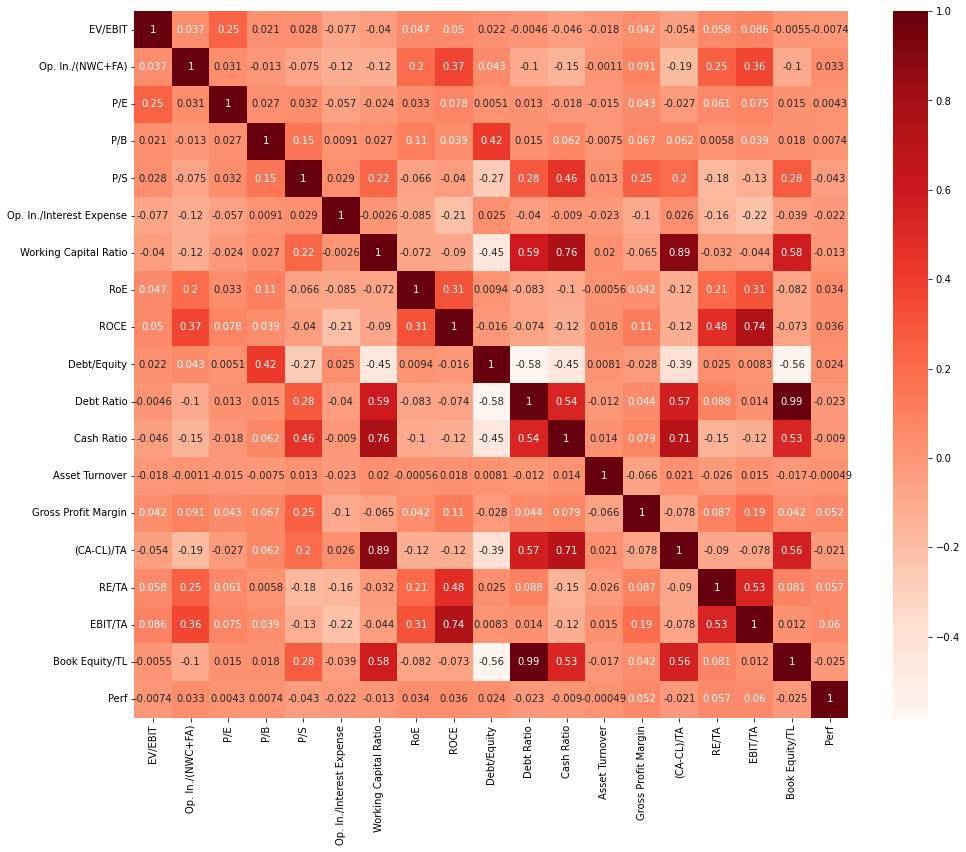

In [130]:
#Using Pearson Correlation
plt.figure(figsize=(16,13))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.savefig('corrxysquare.png')
plt.show()


In [139]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(x_t)
#Fitting sm.OLS model
model = sm.OLS(y_t,X_1).fit()
model.pvalues

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                       1.000000e+00
EV/EBIT                     6.997735e-02
Op. In./(NWC+FA)            3.670898e-01
P/E                         6.112881e-01
P/B                         6.220221e-01
P/S                         3.230504e-09
Op. In./Interest Expense    5.055025e-01
Working Capital Ratio       6.751143e-01
RoE                         6.912103e-02
ROCE                        4.402201e-02
Debt/Equity                 3.557427e-01
Debt Ratio                  1.876557e-01
Cash Ratio                  2.010807e-04
Asset Turnover              6.967412e-01
Gross Profit Margin         3.241577e-11
(CA-CL)/TA                  1.579287e-01
RE/TA                       1.393797e-04
EBIT/TA                     1.350966e-03
Book Equity/TL              7.022109e-02
dtype: float64

In [6]:
import statsmodels.api as sm

In [140]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     10.95
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           6.02e-32
Time:                        13:39:06   Log-Likelihood:                -26181.
No. Observations:               18520   AIC:                         5.240e+04
Df Residuals:                   18501   BIC:                         5.255e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.561e-17      0.007   2.13e-15      1.000      -0.014       0.014
EV/EBIT                     -0.0138      0.008     -1.812      0.070      -0.029       0.001
Op. In./(NWC+FA)             0.0073      0.008      0.902      0.367      -0.009       0.023
P/E                          0.0039      0.008      0.508      0.611      -0.011       0.019
P/B                          0.0046      0.009      0.493      0.622      -0.014       0.023
P/S                         -0.0544      0.009     -5.922      0.000      -0.072      -0.036
Op. In./Interest Expense    -0.0050      0.008     -0.666      0.506      -0.020       0.010
Working Capital Ratio        0.0077      0.018      0.419      0.675      -0.028       0.044
RoE                          0.0145      0.008      1.818      0.069      -0.001       0.030
ROCE                        -0.0235      0.012     -2.014      0.044      -0.046      -0.001
Debt/Equity                  0.0109      0.012      0.924      0.356      -0.012       0.034
Debt Ratio                   0.0802      0.061      1.318      0.188      -0.039       0.199
Cash Ratio                   0.0490      0.013      3.718      0.000       0.023       0.075
Asset Turnover               0.0029      0.007      0.390      0.697      -0.012       0.017
Gross Profit Margin          0.0529      0.008      6.639      0.000       0.037       0.068
(CA-CL)/TA                  -0.0235      0.017     -1.412      0.158      -0.056       0.009
RE/TA                        0.0352      0.009      3.810      0.000       0.017       0.053
EBIT/TA                      0.0385      0.012      3.205      0.001       0.015       0.062
Book Equity/TL              -0.1064      0.059     -1.811      0.070      -0.221       0.009
==============================================================================
Omnibus:                     1093.205   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4662.174
Skew:                          -0.087   Prob(JB):                         0.00
Kurtosis:                       5.452   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
x_t

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL,Perf
0,-0.111867,0.131299,-0.092956,-0.121411,-0.495570,0.428984,0.303209,0.281666,0.621688,0.541736,-0.442724,0.572833,-0.108188,0.686832,0.175533,0.471573,0.359862,-0.419535,1.111840
1,2.355120,-0.199498,-2.668638,0.026984,0.225964,0.034164,0.819106,-0.063969,-1.122831,0.699416,-0.556484,1.202821,-0.120041,0.534547,0.588574,0.397270,-0.260341,-0.525099,0.573270
2,0.062577,-0.052973,0.008725,0.053891,0.347152,0.073755,0.059199,0.208555,0.350177,0.683526,-0.545360,0.360050,-0.118262,0.631846,0.380757,0.382218,0.127405,-0.514746,-0.546977
3,-0.093114,0.048214,-0.068360,-0.090291,0.002306,0.114393,0.621135,0.236942,0.685420,0.063946,-0.047928,1.088751,-0.111154,0.614770,0.738201,0.678313,0.385827,-0.056923,0.242631
4,-0.047498,0.119398,-0.063238,-0.091349,0.140148,0.099811,0.332868,0.222065,0.496876,-0.000403,0.011630,0.708324,-0.115902,0.585844,0.157959,0.749390,0.298012,-0.002462,0.641033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.240063,-1.010213,-0.184328,-0.227983,2.335179,0.251855,1.616390,-0.868335,-1.319848,-1.379625,1.797294,1.779170,-0.159107,-1.767728,2.419697,-1.416736,-2.296170,1.787671,-0.829410
18516,-0.239172,-0.733772,-0.188936,-0.248978,2.335179,0.154545,1.667409,-0.568169,-1.319848,-1.400212,1.833308,1.757352,-0.161183,-1.767728,2.437122,-1.404703,-1.775553,1.832917,0.396649
18517,0.034841,2.149415,0.025021,2.550836,1.168115,0.066482,0.111397,1.845467,2.480940,-0.230777,0.238900,0.805948,0.510956,1.486036,1.022663,-0.535690,10.667886,0.205579,-0.173397
18518,0.030158,1.292322,0.002261,1.442070,1.046310,0.372538,0.093198,1.233700,2.343180,0.038748,-0.024801,0.849349,0.082544,1.536675,0.620978,0.184170,3.977933,-0.035774,1.683839


In [136]:
x_t.drop('Perf', axis=1, inplace=True)

In [137]:
x_t

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL
0,-0.111867,0.131299,-0.092956,-0.121411,-0.495570,0.428984,0.303209,0.281666,0.621688,0.541736,-0.442724,0.572833,-0.108188,0.686832,0.175533,0.471573,0.359862,-0.419535
1,2.355120,-0.199498,-2.668638,0.026984,0.225964,0.034164,0.819106,-0.063969,-1.122831,0.699416,-0.556484,1.202821,-0.120041,0.534547,0.588574,0.397270,-0.260341,-0.525099
2,0.062577,-0.052973,0.008725,0.053891,0.347152,0.073755,0.059199,0.208555,0.350177,0.683526,-0.545360,0.360050,-0.118262,0.631846,0.380757,0.382218,0.127405,-0.514746
3,-0.093114,0.048214,-0.068360,-0.090291,0.002306,0.114393,0.621135,0.236942,0.685420,0.063946,-0.047928,1.088751,-0.111154,0.614770,0.738201,0.678313,0.385827,-0.056923
4,-0.047498,0.119398,-0.063238,-0.091349,0.140148,0.099811,0.332868,0.222065,0.496876,-0.000403,0.011630,0.708324,-0.115902,0.585844,0.157959,0.749390,0.298012,-0.002462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.240063,-1.010213,-0.184328,-0.227983,2.335179,0.251855,1.616390,-0.868335,-1.319848,-1.379625,1.797294,1.779170,-0.159107,-1.767728,2.419697,-1.416736,-2.296170,1.787671
18516,-0.239172,-0.733772,-0.188936,-0.248978,2.335179,0.154545,1.667409,-0.568169,-1.319848,-1.400212,1.833308,1.757352,-0.161183,-1.767728,2.437122,-1.404703,-1.775553,1.832917
18517,0.034841,2.149415,0.025021,2.550836,1.168115,0.066482,0.111397,1.845467,2.480940,-0.230777,0.238900,0.805948,0.510956,1.486036,1.022663,-0.535690,10.667886,0.205579
18518,0.030158,1.292322,0.002261,1.442070,1.046310,0.372538,0.093198,1.233700,2.343180,0.038748,-0.024801,0.849349,0.082544,1.536675,0.620978,0.184170,3.977933,-0.035774


In [138]:
y_t

,Perf
0,1.111840
1,0.573270
2,-0.546977
3,0.242631
4,0.641033
...,...
18515,-0.829410
18516,0.396649
18517,-0.173397
18518,1.683839


In [141]:
x=pd.read_csv("Annual_Stock_Price_Fundamentals_Ratios.csv", index_col=0)
y=pd.read_csv("Annual_Stock_Price_Performance_Percentage.csv", index_col=0)
y=y["Perf"]

In [142]:
y

0        0.764005
1        0.373311
2       -0.152369
3        0.185295
4        0.416215
           ...   
18515   -0.247917
18516    0.268698
18517   -0.008791
18518    1.337917
18519    0.293333
Name: Perf, Length: 18520, dtype: float64

In [143]:
xy = x.join(y)

In [144]:
xy

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL,Perf
0,8.389552,0.297085,8.983232,2.432739,1.078175,79.500000,2.392481,0.270809,0.145323,1.738179,1.575315,1.074436,7.007282,0.553516,0.264307,0.398316,0.117739,0.575315,0.764005
1,161.418182,0.012761,-330.374194,4.073827,2.285561,0.796610,3.527159,-0.012331,0.010171,2.027844,1.493135,2.219947,5.302959,0.511493,0.372832,0.362585,0.008671,0.493135,0.373311
2,19.788151,0.139203,20.694883,4.374320,2.600165,7.447368,2.000973,0.211372,0.116135,1.996292,1.500929,0.859228,5.555102,0.538207,0.318276,0.355198,0.079208,0.500929,-0.152369
3,9.630571,0.226045,11.832164,2.774363,1.810151,14.875000,3.031573,0.234476,0.152909,1.098471,1.910356,1.919978,6.575547,0.533485,0.412057,0.491995,0.121895,0.910356,0.185295
4,12.630608,0.286923,12.423886,2.762727,2.088763,12.163043,2.445325,0.222372,0.131320,1.032015,1.968978,1.241944,5.891753,0.525518,0.259681,0.522494,0.107726,0.968978,0.416215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.335651,-0.701331,-1.841155,1.275704,500.000000,42.023160,6.884329,-0.692882,0.000000,0.168846,6.922574,6.144881,0.231206,0.000000,0.850020,-1.751025,-0.607070,5.922574,-0.247917
18516,-0.271501,-0.455408,-2.410810,1.050584,500.000000,22.547108,7.219675,-0.435780,0.000000,0.160957,7.212825,5.810440,0.000000,0.000000,0.854534,-1.718639,-0.392706,6.212825,0.268698
18517,17.993625,1.973522,22.558857,33.893509,7.090559,6.168276,2.078719,1.502448,1.824561,0.821501,2.217283,1.381922,124.638298,0.794341,0.486505,-0.270019,1.000000,1.217283,-0.008791
18518,17.690044,1.270833,19.954644,20.515204,5.971951,67.337662,2.051267,1.028092,0.845289,1.072005,1.932831,1.450379,38.970696,0.810822,0.381331,0.252662,0.538673,0.932831,1.337917


In [148]:
corrxy = xy.corr()

In [149]:
corrxy

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL,Perf
EV/EBIT,1.000000,0.043279,0.239020,0.004569,-0.041735,-0.081355,-0.029747,0.053181,0.031722,-0.000123,-0.015648,-0.039416,-0.008428,0.026831,-0.056645,0.058921,0.094889,-0.017862,-0.019762
Op. In./(NWC+FA),0.043279,1.000000,0.033841,-0.013010,-0.174538,-0.144313,-0.108650,0.215018,0.333646,0.014112,-0.074454,-0.126479,-0.005969,0.079782,-0.178647,0.252308,0.357256,-0.086014,-0.016440
P/E,0.239020,0.033841,1.000000,0.021336,-0.026380,-0.054231,-0.017257,0.035656,0.039253,-0.009207,0.000494,-0.023247,-0.007692,0.033694,-0.026377,0.044050,0.074031,0.002003,-0.011953
P/B,0.004569,-0.013010,0.021336,1.000000,0.044849,0.029149,0.002667,0.097643,0.023172,0.608756,-0.021826,0.022094,-0.011838,0.075106,0.053712,-0.014635,0.016543,-0.025210,-0.004710
P/S,-0.041735,-0.174538,-0.026380,0.044849,1.000000,0.187629,0.366027,-0.116990,-0.011536,-0.042357,0.310883,0.449240,-0.003427,-0.174903,0.233466,-0.307321,-0.420748,0.309939,0.006691
Op. In./Interest Expense,-0.081355,-0.144313,-0.054231,0.029149,0.187629,1.000000,0.117149,-0.105583,-0.084923,-0.016378,0.101262,0.145130,-0.005531,-0.064023,0.142888,-0.163764,-0.237027,0.113777,0.018121
Working Capital Ratio,-0.029747,-0.108650,-0.017257,0.002667,0.366027,0.117149,1.000000,-0.064961,-0.070364,-0.105691,0.745425,0.922949,0.101241,-0.076268,0.685387,-0.093231,-0.125099,0.752574,-0.005238
RoE,0.053181,0.215018,0.035656,0.097643,-0.116990,-0.105583,-0.064961,1.000000,0.272206,0.089179,-0.035065,-0.091609,-0.003639,0.032426,-0.118622,0.209092,0.322815,-0.040936,-0.004943
ROCE,0.031722,0.333646,0.039253,0.023172,-0.011536,-0.084923,-0.070364,0.272206,1.000000,-0.010043,-0.044321,-0.075305,0.040630,0.043841,-0.146828,-0.033309,0.246796,-0.048998,0.005655
Debt/Equity,-0.000123,0.014112,-0.009207,0.608756,-0.042357,-0.016378,-0.105691,0.089179,-0.010043,1.000000,-0.134161,-0.087721,0.017170,-0.020007,-0.117841,-0.003789,0.002104,-0.160555,0.005709


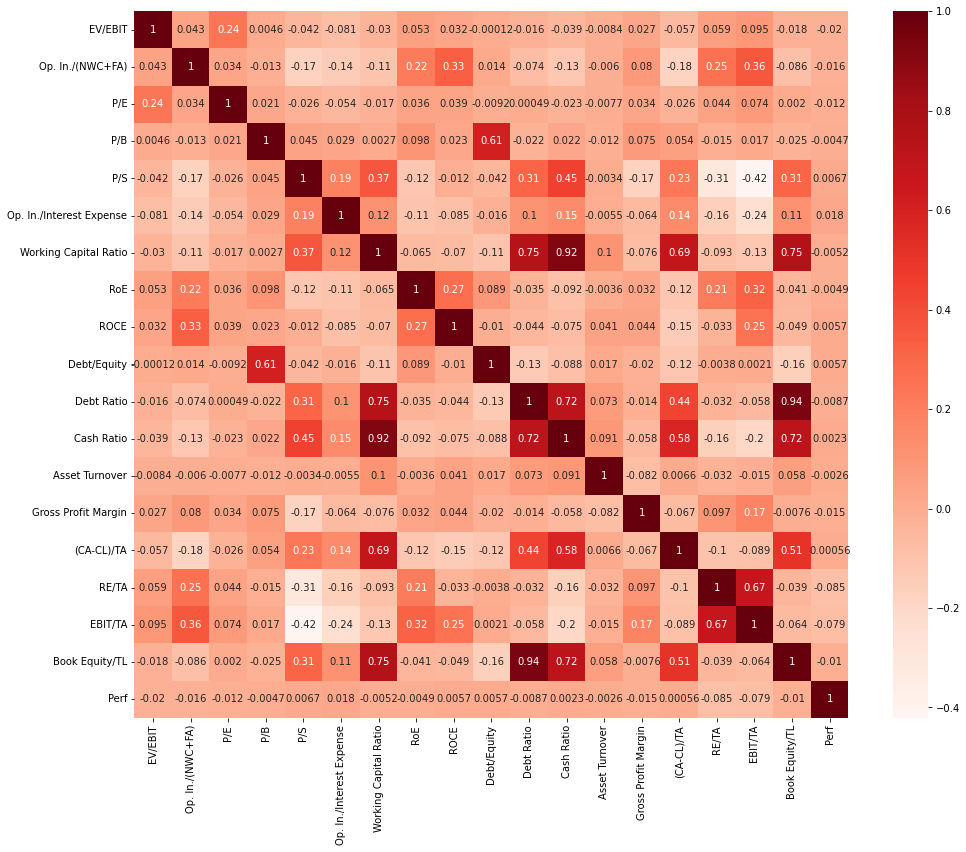

In [150]:
#Using Pearson Correlation
plt.figure(figsize=(16,13))
sns.heatmap(corrxy, annot=True, cmap=plt.cm.Reds)
plt.show()

In [9]:
X_1 = sm.add_constant(x)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.summary()

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     10.60
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           1.04e-30
Time:                        10:46:29   Log-Likelihood:                -30633.
No. Observations:               18520   AIC:                         6.130e+04
Df Residuals:                   18501   BIC:                         6.145e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2207      0.025      8.882      0.000       0.172       0.269
EV/EBIT                     -0.0002      0.000     -1.567      0.117      -0.000    5.49e-05
Op. In./(NWC+FA)             0.0118      0.012      0.965      0.334      -0.012       0.036
P/E                      -3.637e-05    8.1e-05     -0.449      0.654      -0.000       0.000
P/B                         -0.0013      0.001     -1.173      0.241      -0.003       0.001
P/S                         -0.0006      0.000     -4.006      0.000      -0.001      -0.000
Op. In./Interest Expense  1.887e-05   5.25e-05      0.360      0.719    -8.4e-05       0.000
Working Capital Ratio       -0.0122      0.010     -1.231      0.219      -0.032       0.007
RoE                          0.0319      0.012      2.601      0.009       0.008       0.056
ROCE                         0.1089      0.064      1.690      0.091      -0.017       0.235
Debt/Equity                  0.0016      0.002      0.913      0.361      -0.002       0.005
Debt Ratio                   0.0098      0.009      1.090      0.276      -0.008       0.028
Cash Ratio                   0.0088      0.009      0.936      0.349      -0.010       0.027
Asset Turnover           -3.461e-05   4.31e-05     -0.803      0.422      -0.000    4.98e-05
Gross Profit Margin         -0.0277      0.038     -0.724      0.469      -0.103       0.047
(CA-CL)/TA                   0.0692      0.053      1.293      0.196      -0.036       0.174
RE/TA                       -0.0315      0.006     -5.200      0.000      -0.043      -0.020
EBIT/TA                     -0.3314      0.059     -5.651      0.000      -0.446      -0.216
Book Equity/TL              -0.0125      0.011     -1.094      0.274      -0.035       0.010
==============================================================================
Omnibus:                    52061.161   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3158933790.465
Skew:                          36.710   Prob(JB):                         0.00
Kurtosis:                    2024.945   Cond. No.                     1.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
x

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL
0,8.389552,0.297085,8.983232,2.432739,1.078175,79.500000,2.392481,0.270809,0.145323,1.738179,1.575315,1.074436,7.007282,0.553516,0.264307,0.398316,0.117739,0.575315
1,161.418182,0.012761,-330.374194,4.073827,2.285561,0.796610,3.527159,-0.012331,0.010171,2.027844,1.493135,2.219947,5.302959,0.511493,0.372832,0.362585,0.008671,0.493135
2,19.788151,0.139203,20.694883,4.374320,2.600165,7.447368,2.000973,0.211372,0.116135,1.996292,1.500929,0.859228,5.555102,0.538207,0.318276,0.355198,0.079208,0.500929
3,9.630571,0.226045,11.832164,2.774363,1.810151,14.875000,3.031573,0.234476,0.152909,1.098471,1.910356,1.919978,6.575547,0.533485,0.412057,0.491995,0.121895,0.910356
4,12.630608,0.286923,12.423886,2.762727,2.088763,12.163043,2.445325,0.222372,0.131320,1.032015,1.968978,1.241944,5.891753,0.525518,0.259681,0.522494,0.107726,0.968978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.335651,-0.701331,-1.841155,1.275704,500.000000,42.023160,6.884329,-0.692882,0.000000,0.168846,6.922574,6.144881,0.231206,0.000000,0.850020,-1.751025,-0.607070,5.922574
18516,-0.271501,-0.455408,-2.410810,1.050584,500.000000,22.547108,7.219675,-0.435780,0.000000,0.160957,7.212825,5.810440,0.000000,0.000000,0.854534,-1.718639,-0.392706,6.212825
18517,17.993625,1.973522,22.558857,33.893509,7.090559,6.168276,2.078719,1.502448,1.824561,0.821501,2.217283,1.381922,124.638298,0.794341,0.486505,-0.270019,1.000000,1.217283
18518,17.690044,1.270833,19.954644,20.515204,5.971951,67.337662,2.051267,1.028092,0.845289,1.072005,1.932831,1.450379,38.970696,0.810822,0.381331,0.252662,0.538673,0.932831


In [156]:
y

0        0.764005
1        0.373311
2       -0.152369
3        0.185295
4        0.416215
           ...   
18515   -0.247917
18516    0.268698
18517   -0.008791
18518    1.337917
18519    0.293333
Name: Perf, Length: 18520, dtype: float64

In [160]:
from sklearn.preprocessing import StandardScaler

In [161]:
scale = StandardScaler()

In [162]:
r = scale.fit_transform(x)

In [168]:
y

0        0.764005
1        0.373311
2       -0.152369
3        0.185295
4        0.416215
           ...   
18515   -0.247917
18516    0.268698
18517   -0.008791
18518    1.337917
18519    0.293333
Name: Perf, Length: 18520, dtype: float64

In [169]:
y=pd.read_csv("Annual_Stock_Price_Performance_Percentage.csv", index_col=0)

In [170]:
y.drop('Ticker', axis=1, inplace=True)

In [171]:
y

,Perf
0,0.764005
1,0.373311
2,-0.152369
3,0.185295
4,0.416215
...,...
18515,-0.247917
18516,0.268698
18517,-0.008791
18518,1.337917


In [199]:
r = scale.fit_transform(x)
r = pd.DataFrame(r,columns=x.keys())

In [200]:
t = scale.fit_transform(y)
t = pd.DataFrame(t,columns=y.keys())

In [203]:
r.describe()

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL
count,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04,1.852000e+04
mean,-4.960335e-17,-8.127648e-17,2.276497e-18,2.110143e-18,-4.139357e-17,-1.889058e-16,-3.243746e-17,1.083247e-17,-2.396451e-16,-5.008293e-17,-9.872712e-17,1.695608e-17,-1.688939e-17,4.164415e-16,4.361762e-17,-2.736832e-16,-5.479178e-18,4.480457e-17
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-7.440287e+00,-5.998467e+00,-8.583042e+00,-4.849713e+00,-2.050678e-01,-1.218656e+00,-8.957419e-01,-6.057309e+00,-7.114311e-01,-3.290621e-01,-8.507995e-01,-4.999223e-01,-9.281309e+00,-1.563230e+00,-6.507743e+00,-8.962110e+00,-7.970131e+00,-1.440463e+00
25%,-1.160401e-01,-1.527882e-01,-1.506117e-01,-2.383362e-01,-1.936486e-01,-1.478257e-01,-4.935884e-01,-4.409051e-02,-6.015313e-01,-2.613330e-01,-4.000371e-01,-4.354770e-01,-1.550328e-01,-7.250180e-01,-6.616542e-01,8.860107e-02,-3.662402e-02,-4.780297e-01
50%,-2.145439e-03,-1.355986e-02,-4.363857e-03,-1.415651e-01,-1.810168e-01,-1.191625e-01,-2.816548e-01,8.244553e-02,-2.019146e-01,-1.804434e-01,-2.691102e-01,-3.129937e-01,-1.389466e-01,-9.666469e-02,-1.328544e-01,2.135016e-01,1.701354e-01,-3.133426e-01
75%,1.137050e-01,1.973652e-01,8.529484e-02,4.172954e-02,-1.517483e-01,-6.541155e-02,1.041880e-01,1.901524e-01,2.386705e-01,-4.370963e-02,5.246630e-03,-1.513372e-02,-1.119332e-01,7.264314e-01,5.686473e-01,3.291397e-01,3.833049e-01,3.175861e-02
max,7.054468e+00,5.597595e+00,8.291454e+00,8.605131e+00,6.659606e+00,4.170545e+00,9.019517e+00,5.994982e+00,1.119537e+01,1.381443e+01,1.486798e+01,1.016488e+01,8.950918e+00,1.029014e+01,2.926266e+00,1.061320e+00,3.853607e+00,7.259198e+00


In [204]:
t.describe()

,Perf
count,1.852000e+04
mean,9.672488e-18
std,1.000027e+00
min,-9.493380e-01
25%,-2.692219e-01
50%,-9.061510e-02
75%,1.080435e-01
max,6.461486e+01


In [205]:
xysc = r.join(t)

In [206]:
xysc

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL,Perf
0,-0.071305,0.144066,-0.070000,-0.146551,-0.190265,0.287626,-0.105011,0.295224,0.153736,-0.083223,-0.355559,-0.117967,-0.133256,0.623779,0.179614,0.331576,0.376401,-0.422083,0.432863
1,2.146807,-0.185638,-2.933243,0.000653,-0.173689,-0.136522,0.270011,-0.046025,-0.650879,-0.042254,-0.381394,0.289254,-0.141025,0.457742,0.590964,0.315297,-0.053466,-0.454580,0.125607
2,0.093915,-0.039015,0.028814,0.027607,-0.169369,-0.100680,-0.234407,0.223589,-0.020034,-0.046717,-0.378944,-0.194472,-0.139875,0.563293,0.384174,0.311931,0.224539,-0.451498,-0.287808
3,-0.053317,0.061687,-0.045963,-0.115907,-0.180216,-0.060651,0.106215,0.251435,0.198895,-0.173700,-0.250230,0.182617,-0.135224,0.544633,0.739639,0.374257,0.392778,-0.289594,-0.022256
4,-0.009832,0.132281,-0.040970,-0.116951,-0.176390,-0.075266,-0.087545,0.236846,0.070370,-0.183099,-0.231801,-0.058420,-0.138341,0.513155,0.162080,0.388153,0.336935,-0.266413,0.159348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,-0.197775,-1.013704,-0.161328,-0.250335,6.659606,0.085656,1.379585,-0.866245,-0.711431,-0.305181,1.325489,1.684542,-0.164142,-1.563230,2.399678,-0.647686,-2.480253,1.692433,-0.362950
18516,-0.196845,-0.728530,-0.166135,-0.270528,6.659606,-0.019305,1.490419,-0.556379,-0.711431,-0.306297,1.416737,1.565650,-0.165196,-1.563230,2.416787,-0.632930,-1.635392,1.807209,0.043335
18517,0.067904,2.088072,0.044541,2.675448,-0.107719,-0.107573,-0.208712,1.779631,10.150912,-0.212873,-0.153740,-0.008658,0.402913,1.575309,1.021823,0.027076,3.853607,-0.168223,-0.174893
18518,0.063503,1.273230,0.022568,1.475428,-0.123077,0.222081,-0.217785,1.207923,4.320910,-0.177443,-0.243164,0.015678,0.012435,1.640427,0.623176,0.265215,2.035405,-0.280707,0.884210


In [207]:
corrsc = xysc.corr()

In [208]:
corrsc

,EV/EBIT,Op. In./(NWC+FA),P/E,P/B,P/S,Op. In./Interest Expense,Working Capital Ratio,RoE,ROCE,Debt/Equity,Debt Ratio,Cash Ratio,Asset Turnover,Gross Profit Margin,(CA-CL)/TA,RE/TA,EBIT/TA,Book Equity/TL,Perf
EV/EBIT,1.000000,0.043279,0.239020,0.004569,-0.041735,-0.081355,-0.029747,0.053181,0.031722,-0.000123,-0.015648,-0.039416,-0.008428,0.026831,-0.056645,0.058921,0.094889,-0.017862,-0.019762
Op. In./(NWC+FA),0.043279,1.000000,0.033841,-0.013010,-0.174538,-0.144313,-0.108650,0.215018,0.333646,0.014112,-0.074454,-0.126479,-0.005969,0.079782,-0.178647,0.252308,0.357256,-0.086014,-0.016440
P/E,0.239020,0.033841,1.000000,0.021336,-0.026380,-0.054231,-0.017257,0.035656,0.039253,-0.009207,0.000494,-0.023247,-0.007692,0.033694,-0.026377,0.044050,0.074031,0.002003,-0.011953
P/B,0.004569,-0.013010,0.021336,1.000000,0.044849,0.029149,0.002667,0.097643,0.023172,0.608756,-0.021826,0.022094,-0.011838,0.075106,0.053712,-0.014635,0.016543,-0.025210,-0.004710
P/S,-0.041735,-0.174538,-0.026380,0.044849,1.000000,0.187629,0.366027,-0.116990,-0.011536,-0.042357,0.310883,0.449240,-0.003427,-0.174903,0.233466,-0.307321,-0.420748,0.309939,0.006691
Op. In./Interest Expense,-0.081355,-0.144313,-0.054231,0.029149,0.187629,1.000000,0.117149,-0.105583,-0.084923,-0.016378,0.101262,0.145130,-0.005531,-0.064023,0.142888,-0.163764,-0.237027,0.113777,0.018121
Working Capital Ratio,-0.029747,-0.108650,-0.017257,0.002667,0.366027,0.117149,1.000000,-0.064961,-0.070364,-0.105691,0.745425,0.922949,0.101241,-0.076268,0.685387,-0.093231,-0.125099,0.752574,-0.005238
RoE,0.053181,0.215018,0.035656,0.097643,-0.116990,-0.105583,-0.064961,1.000000,0.272206,0.089179,-0.035065,-0.091609,-0.003639,0.032426,-0.118622,0.209092,0.322815,-0.040936,-0.004943
ROCE,0.031722,0.333646,0.039253,0.023172,-0.011536,-0.084923,-0.070364,0.272206,1.000000,-0.010043,-0.044321,-0.075305,0.040630,0.043841,-0.146828,-0.033309,0.246796,-0.048998,0.005655
Debt/Equity,-0.000123,0.014112,-0.009207,0.608756,-0.042357,-0.016378,-0.105691,0.089179,-0.010043,1.000000,-0.134161,-0.087721,0.017170,-0.020007,-0.117841,-0.003789,0.002104,-0.160555,0.005709


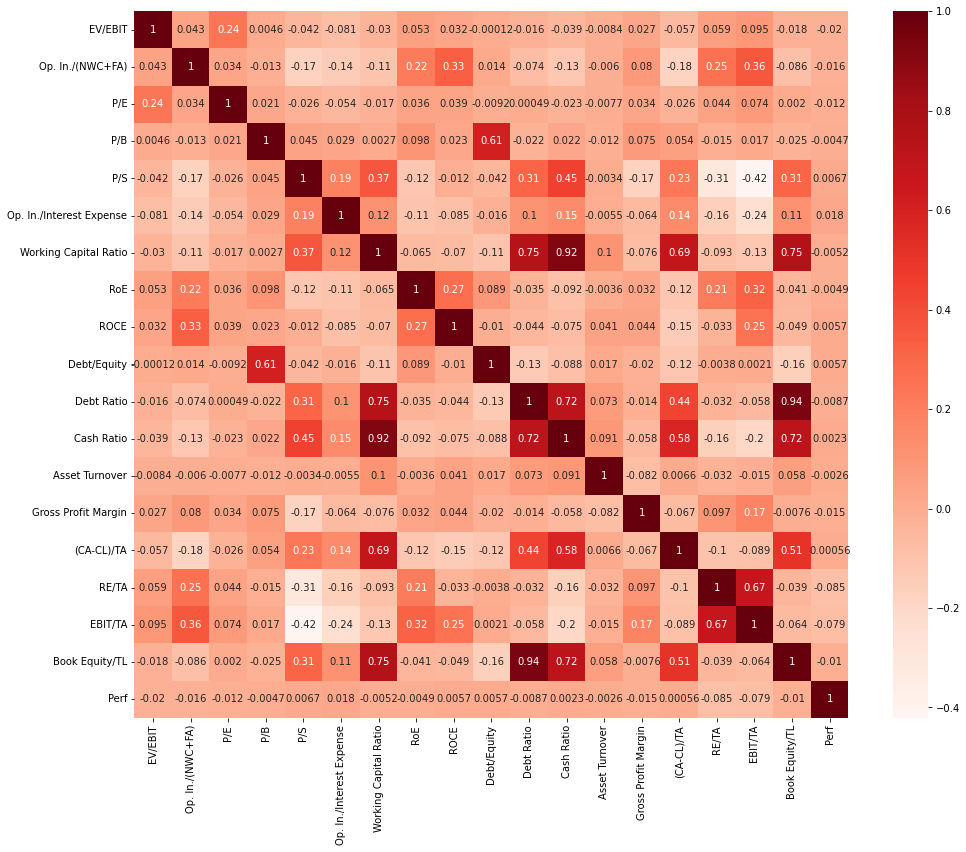

In [209]:
#Using Pearson Correlation
plt.figure(figsize=(16,13))
sns.heatmap(corrsc, annot=True, cmap=plt.cm.Reds)
plt.show()

In [210]:
X_1 = sm.add_constant(r)
#Fitting sm.OLS model
model = sm.OLS(t,X_1).fit()
model.summary()

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Perf   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     10.60
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           1.04e-30
Time:                        15:47:26   Log-Likelihood:                -26184.
No. Observations:               18520   AIC:                         5.241e+04
Df Residuals:                   18501   BIC:                         5.255e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -5.204e-18      0.007  -7.12e-16      1.000      -0.014       0.014
EV/EBIT                     -0.0119      0.008     -1.567      0.117      -0.027       0.003
Op. In./(NWC+FA)             0.0080      0.008      0.965      0.334      -0.008       0.024
P/E                         -0.0034      0.008     -0.449      0.654      -0.018       0.011
P/B                         -0.0112      0.010     -1.173      0.241      -0.030       0.007
P/S                         -0.0365      0.009     -4.006      0.000      -0.054      -0.019
Op. In./Interest Expense     0.0028      0.008      0.360      0.719      -0.012       0.018
Working Capital Ratio       -0.0291      0.024     -1.231      0.219      -0.075       0.017
RoE                          0.0208      0.008      2.601      0.009       0.005       0.037
ROCE                         0.0144      0.009      1.690      0.091      -0.002       0.031
Debt/Equity                  0.0087      0.010      0.913      0.361      -0.010       0.027
Debt Ratio                   0.0246      0.023      1.090      0.276      -0.020       0.069
Cash Ratio                   0.0195      0.021      0.936      0.349      -0.021       0.060
Asset Turnover              -0.0060      0.007     -0.803      0.422      -0.021       0.009
Gross Profit Margin         -0.0055      0.008     -0.724      0.469      -0.020       0.009
(CA-CL)/TA                   0.0143      0.011      1.293      0.196      -0.007       0.036
RE/TA                       -0.0544      0.010     -5.200      0.000      -0.075      -0.034
EBIT/TA                     -0.0661      0.012     -5.651      0.000      -0.089      -0.043
Book Equity/TL              -0.0248      0.023     -1.094      0.274      -0.069       0.020
==============================================================================
Omnibus:                    52061.161   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3158933790.465
Skew:                          36.710   Prob(JB):                         0.00
Kurtosis:                    2024.945   Cond. No.                         8.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

IndexError: index 6 is out of bounds for axis 0 with size 6

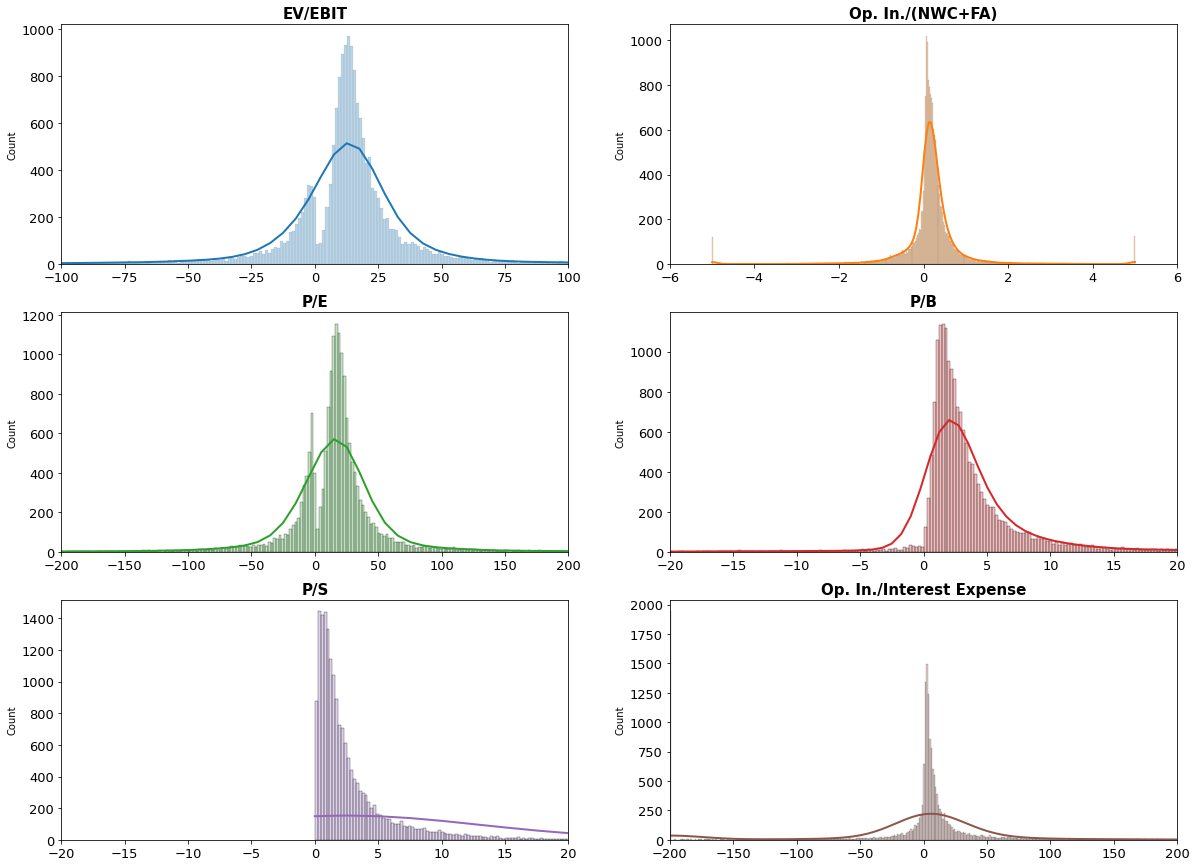

In [263]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
axes = axes.flat
columnas_numeric = x.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Perf')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = x,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 13)
    axes[i].set_xlabel("")
    axes[0].set_xlim([-100, 100])
    axes[1].set_xlim([-6, 6])
    axes[2].set_xlim([-200, 200])
    axes[3].set_xlim([-20, 20])
    axes[4].set_xlim([-20, 20])
    axes[5].set_xlim([-200, 200])
    plt.savefig('plotdistx.png')

    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [1]:
x

NameError: name 'x' is not defined